In [30]:
import pandas as pd               # for Data Manipulation
import matplotlib.pyplot as plt   # for Visualization
import numpy as np                #for Mathematical calculations
import seaborn as sns             #for Advanced visualizations

In [31]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
crime = pd.read_csv("crime_data.csv")

In [33]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [34]:
crime.tail()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
45,Virginia,8.5,156,63,20.7
46,Washington,4.0,145,73,26.2
47,West Virginia,5.7,81,39,9.3
48,Wisconsin,2.6,53,66,10.8
49,Wyoming,6.8,161,60,15.6


In [35]:
# We see the columns in the dataset
crime['State'] = crime.iloc[:,0]
crime = crime.iloc[:, [5,1,2,3,4]]

In [36]:
crime.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [37]:
# As a part of the Data cleansing we check the data for any missing/ na values
crime.isna().sum()

State       0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [38]:
# Additionally we check the data for any duplicate values, now this can be an optional check depending on the data being used
crime1 = crime.duplicated()
sum(crime1)

0

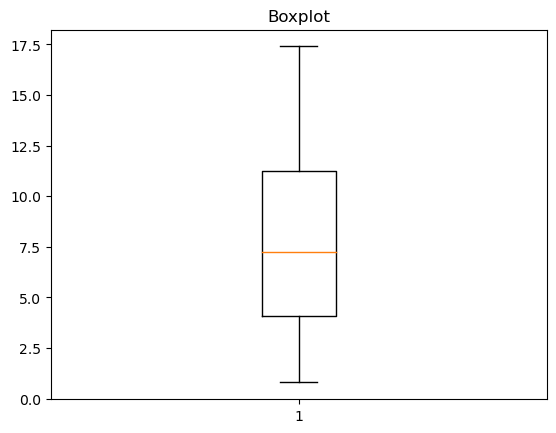

In [39]:
# We now plot the boxplot for the data using each feature independently and check for Outliers
plt.boxplot(crime.Murder);plt.title('Boxplot');plt.show()

# We see that there are Outliers present for "Balance" Feature

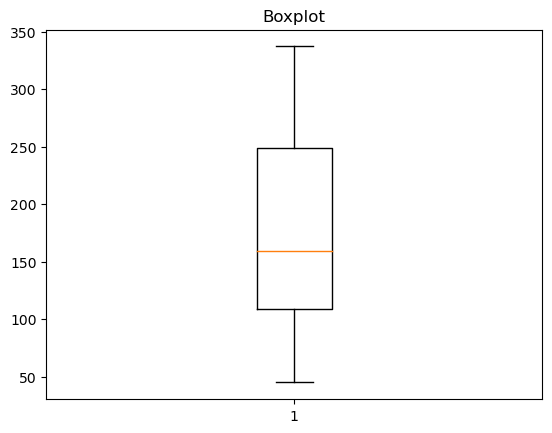

In [40]:
plt.boxplot(crime.Assault);plt.title('Boxplot');plt.show()  # outliers present

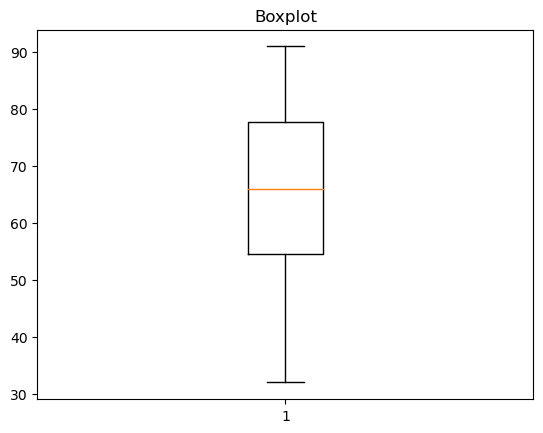

In [41]:
plt.boxplot(crime.UrbanPop);plt.title('Boxplot');plt.show()  # No outliers 

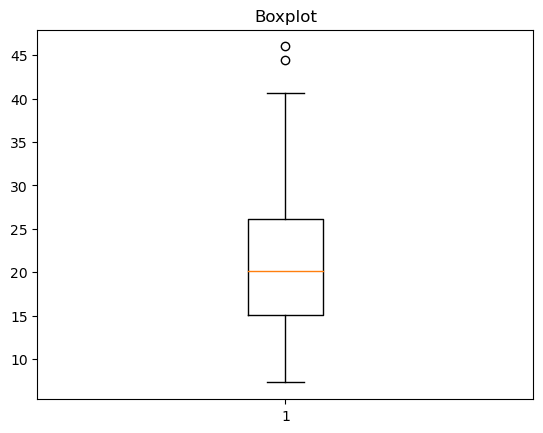

In [42]:
plt.boxplot(crime.Rape);plt.title('Boxplot');plt.show()  # outliers present

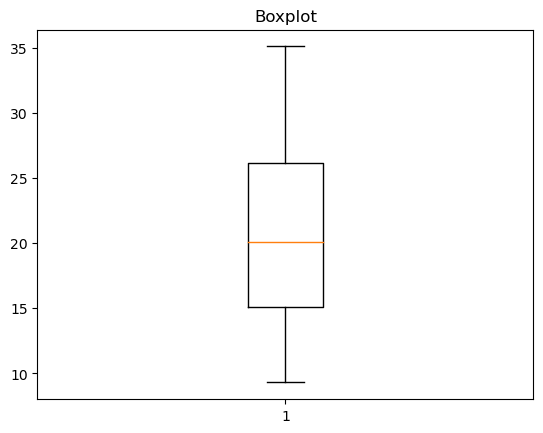

In [43]:
#We have outliers so we have to remove outliers by using winsorization technique
from scipy.stats.mstats import winsorize

crime['Rape'] = winsorize(crime.Rape, limits=[0.07, 0.093])   
plt.boxplot(crime['Rape']);
plt.title('Boxplot');
plt.show()


In [44]:
# Now we check the data for zero variance values
(crime == 0).all()

State       False
Murder      False
Assault     False
UrbanPop    False
Rape        False
dtype: bool

In [45]:
# We see the data again now to check whether the data is in scale
print(crime.describe)


<bound method NDFrame.describe of              State  Murder  Assault  UrbanPop  Rape
0          Alabama    13.2      236        58  21.2
1           Alaska    10.0      263        48  35.1
2          Arizona     8.1      294        80  31.0
3         Arkansas     8.8      190        50  19.5
4       California     9.0      276        91  35.1
5         Colorado     7.9      204        78  35.1
6      Connecticut     3.3      110        77  11.1
7         Delaware     5.9      238        72  15.8
8          Florida    15.4      335        80  31.9
9          Georgia    17.4      211        60  25.8
10          Hawaii     5.3       46        83  20.2
11           Idaho     2.6      120        54  14.2
12        Illinois    10.4      249        83  24.0
13         Indiana     7.2      113        65  21.0
14            Iowa     2.2       56        57  11.3
15          Kansas     6.0      115        66  18.0
16        Kentucky     9.7      109        52  16.3
17       Louisiana    15.4    

In [46]:
# we notice that the data needs to be normalise, using normalization

In [47]:
def norm_func(i):
    x = (i - i.min())/ (i.max() - i.min())
    return (x)

# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(crime.iloc[:,1:])

(array([5., 8., 5., 9., 6., 3., 5., 4., 3., 2.]),
 array([ 0.8 ,  2.46,  4.12,  5.78,  7.44,  9.1 , 10.76, 12.42, 14.08,
        15.74, 17.4 ]),
 <BarContainer object of 10 artists>)

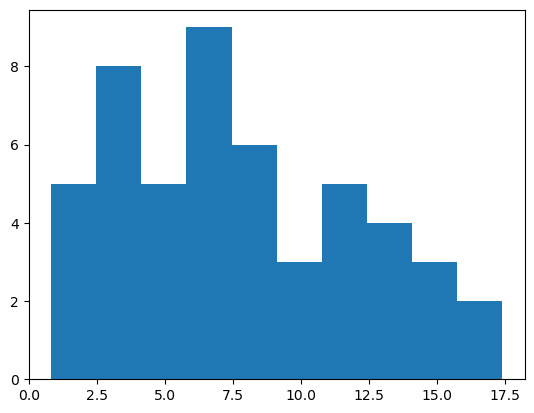

In [50]:
##########################Univariate, Bivariate################
plt.hist(crime["Murder"])   #Univariate


(array([7., 4., 9., 7., 4., 3., 4., 6., 4., 2.]),
 array([ 45. ,  74.2, 103.4, 132.6, 161.8, 191. , 220.2, 249.4, 278.6,
        307.8, 337. ]),
 <BarContainer object of 10 artists>)

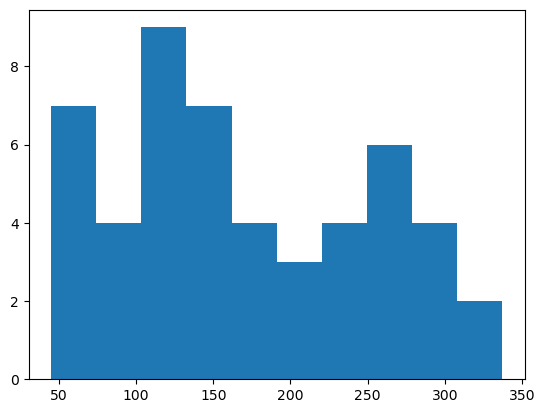

In [51]:
plt.hist(crime["Assault"])


(array([1., 1., 6., 5., 6., 9., 6., 4., 8., 4.]),
 array([32. , 37.9, 43.8, 49.7, 55.6, 61.5, 67.4, 73.3, 79.2, 85.1, 91. ]),
 <BarContainer object of 10 artists>)

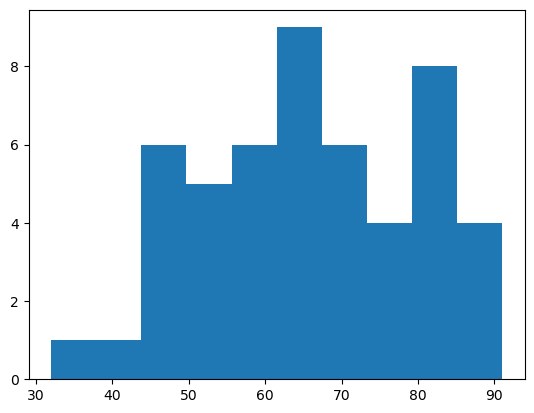

In [52]:
plt.hist(crime["UrbanPop"])


(array([9., 2., 9., 4., 7., 3., 5., 3., 3., 5.]),
 array([ 9.3 , 11.88, 14.46, 17.04, 19.62, 22.2 , 24.78, 27.36, 29.94,
        32.52, 35.1 ]),
 <BarContainer object of 10 artists>)

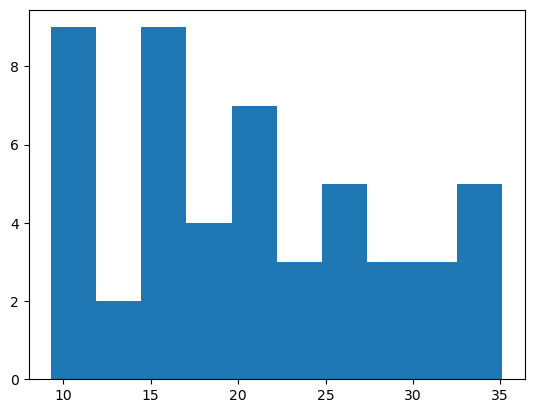

In [53]:
plt.hist(crime["Rape"])


In [54]:
crime.skew(axis = 0, skipna = True) 


Murder      0.393956
Assault     0.234410
UrbanPop   -0.226009
Rape        0.340837
dtype: float64

In [55]:
crime.kurtosis(axis = 0, skipna = True)

Murder     -0.827488
Assault    -1.053848
UrbanPop   -0.738360
Rape       -0.883786
dtype: float64

In [49]:
# calculating TWSS - Total within SS using different cluster range
from sklearn.cluster import KMeans

TWSS = []
k = list(range(2, 8))

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    TWSS.append(kmeans.inertia_)
    
TWSS

[7.35837649853608,
 5.532071995078604,
 4.040767895223881,
 3.4957671989786205,
 3.1300493274177312,
 2.8795181285925464]

Text(0, 0.5, 'total_within_SS')

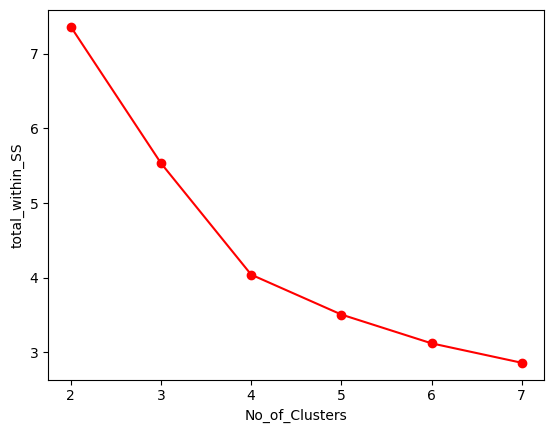

In [21]:
# Plotting the Scree plot using the TWSS from above defined function
plt.plot(k, TWSS, 'ro-');
plt.xlabel("No_of_Clusters");
plt.ylabel("total_within_SS")

In [22]:
# Selecting 4 clusters from the above scree plot which is the optimum number of clusters, 
# as the curve is seemingly bent or showinf an elbow format at K = 4

model = KMeans(n_clusters = 4)
model.fit(df_norm)

C:\Users\mitul\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [23]:
model.labels_ # getting the labels of clusters assigned to each row

array([1, 2, 2, 1, 2, 2, 3, 3, 2, 1, 3, 0, 2, 3, 0, 3, 0, 1, 0, 2, 3, 2,
       0, 1, 2, 0, 0, 2, 0, 3, 2, 2, 1, 0, 3, 3, 3, 3, 3, 1, 0, 1, 2, 3,
       0, 3, 3, 0, 0, 3])

In [24]:
mb = pd.Series(model.labels_)  # converting numpy array into pandas series object 

In [25]:
crime['clust'] = mb # creating a  new column and assigning it to new column 

In [26]:
crime.head()

,State,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,35.1,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,35.1,2


In [27]:
crime = crime.iloc[:,[5,0,1,2,3,4]]
crime.head()

,clust,State,Murder,Assault,UrbanPop,Rape
0,1,Alabama,13.2,236,58,21.2
1,2,Alaska,10.0,263,48,35.1
2,2,Arizona,8.1,294,80,31.0
3,1,Arkansas,8.8,190,50,19.5
4,2,California,9.0,276,91,35.1


In [28]:
# We can clearly see that we have the labels in the dataset in the form of a column called "clust", symbolizing the clusters

In [29]:
# In order to see the clusters we aggregate the records within the clusters and group them by the clusters to visualize the 
# 4 nos of clear cluster formed
crime.iloc[:, 1:6].groupby(crime.clust).mean()

,Murder,Assault,UrbanPop,Rape
clust,,,,
0,3.600000,78.538462,52.076923,12.446154
1,13.937500,243.625000,53.750000,21.412500
2,10.815385,257.384615,76.000000,30.930769
3,5.656250,138.875000,73.875000,18.843750


In [ ]:
#We can now clearly see the 4 number of clusters formed, which can be described as under
# Cluster1, "0" = Defines the group of state that are low on crime rate and would require lesser of an action to be taken, but of course not to be neglected at any cost.

# Cluster2, "1" = Defines the group of states that have comparatively high crime rate and would require action as well
 
# Cluster3, "2" = Defines the group of states that are high on crime in either if the categories described and need immediate action on high alert.
                       
# Cluster4, "3" = Defines the group of states that are medium on crime rate while the Urbanpop i on high and need action on a alert side
                      
